In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import stats
from scipy.stats import randint

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [7]:
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    precision_recall_curve,
)
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier

In [11]:
from subprocess import check_output

In [12]:
# read the data from the file
data = pd.read_csv("data/mental-health-in-tech-survey.zip")

In [13]:
# How many rows and columns (we have 1259 rows and 27 columns)
print(data.shape)

(1259, 27)


In [14]:
# the only column with numerical values and its attributes
print(data.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [15]:
# what kind of data do we have?
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [16]:
# Cleaning the data by dropping unnecessary columns
data = data.drop(["Timestamp"], axis=1)
data = data.drop(["comments"], axis=1)
# data = data.drop(["state"], axis=1)

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [18]:
data.isnull().sum().max()

515

In [19]:
# addressing the missing data
defaultNum = 0
defaultStr = "NaN"
defaultFl = 0.0
numFeat = ["Age"]
strFeat = [
    "Gender",
    "Country",
    "state",
    "self_employed",
    "family_history",
    "treatment",
    "work_interfere",
    "no_employees",
    "remote_work",
    "tech_company",
    "benefits",
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "leave",
    "mental_health_consequence",
    "phys_health_consequence",
    "coworkers",
    "supervisor",
    "mental_health_interview",
    "phys_health_interview",
    "mental_vs_physical",
    "obs_consequence",
]
fltFeat = []

In [20]:
for item in data:
    if item in numFeat:
        data[item] = data[item].fillna(defaultNum)
    elif item in strFeat:
        data[item] = data[item].fillna(defaultStr)
    elif item in fltFeat:
        data[item] = data[item].fillna(defaultFl)
    else:
        print("error with", item, type(item))

In [21]:
data.head(5)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [22]:
# Normalizing cases
gender = data["Gender"].str.lower()
# print(gender)

In [23]:
gender = data["Gender"].str.lower().unique()
print(gender)
states = data["state"].str.lower().unique()
print(states)

['female' 'm' 'male' 'male-ish' 'maile' 'trans-female' 'cis female' 'f'
 'something kinda male?' 'cis male' 'woman' 'mal' 'male (cis)'
 'queer/she/they' 'non-binary' 'femake' 'make' 'nah' 'all' 'enby' 'fluid'
 'genderqueer' 'female ' 'androgyne' 'agender' 'cis-female/femme'
 'guy (-ish) ^_^' 'male leaning androgynous' 'male ' 'man' 'trans woman'
 'msle' 'neuter' 'female (trans)' 'queer' 'female (cis)' 'mail'
 'a little about you' 'malr' 'p' 'femail' 'cis man'
 'ostensibly male, unsure what that really means']
['il' 'in' 'nan' 'tx' 'tn' 'mi' 'oh' 'ca' 'ct' 'md' 'ny' 'nc' 'ma' 'ia'
 'pa' 'wa' 'wi' 'ut' 'nm' 'or' 'fl' 'mn' 'mo' 'az' 'co' 'ga' 'dc' 'ne'
 'wv' 'ok' 'ks' 'va' 'nh' 'ky' 'al' 'nv' 'nj' 'sc' 'vt' 'sd' 'id' 'ms'
 'ri' 'wy' 'la' 'me']


In [24]:
male = [
    "male",
    "m",
    "male-ish",
    "maile",
    "mal",
    "male (cis)",
    "make",
    "male ",
    "man",
    "msle",
    "mail",
    "malr",
    "cis man",
    "Cis Male",
    "cis male",
]
trans = [
    "trans-female",
    "something kinda male?",
    "queer/she/they",
    "non-binary",
    "nah",
    "all",
    "enby",
    "fluid",
    "genderqueer",
    "androgyne",
    "agender",
    "male leaning androgynous",
    "guy (-ish) ^_^",
    "trans woman",
    "neuter",
    "female (trans)",
    "queer",
    "ostensibly male, unsure what that really means",
]
female = [
    "cis female",
    "f",
    "female",
    "woman",
    "femake",
    "female ",
    "cis-female/femme",
    "female (cis)",
    "femail",
]
# data.head(5)

In [25]:
# setting to unique attributes
for (row, col) in data.iterrows():
    if str.lower(col.Gender) in male:
        data["Gender"].replace(
            to_replace=col.Gender, value="male", inplace=True
        )
        # data["state"].replace(to_replace=col.state, value=str.lower(col.state), inplace=True)

    elif str.lower(col.Gender) in female:
        data["Gender"].replace(
            to_replace=col.Gender, value="female", inplace=True
        )
    elif str.lower(col.Gender) in trans:
        data["Gender"].replace(
            to_replace=col.Gender, value="trans", inplace=True
        )
extra = ["A little about you", "p"]
data = data[~data["Gender"].isin(extra)]
print(data["Gender"].unique())

['female' 'male' 'trans']


In [26]:
# Fill in the missing age
data["Age"].fillna(data["Age"].median(), inplace=True)
# adress unreasonable values
array = pd.Series(
    data["Age"]
)  # series returns sth like an array of any object type
array[array < 18] = data["Age"].median()

data["Age"] = array

array = pd.Series(data["Age"])
array[array > 120] = data["Age"].median()
data["Age"] = array

print(data.describe())

               Age
count  1257.000000
mean     32.071599
std       7.271222
min      18.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      72.000000


In [27]:
# group by age range
data["Age_range"] = pd.cut(
    data["Age"],
    [0, 20, 30, 65, 100],
    labels=["0-20", "21-30", "31-65", "66-100"],
    include_lowest=True,
)
# change all non self-employed people from NaN to NOT self employed
data["self_employed"] = data["self_employed"].replace([defaultStr], "No")
print(data["self_employed"].unique())
# also change the NaN in work_intefere to don't know
data["work_interfere"] = data["work_interfere"].replace(
    [defaultStr], "Do not know"
)
print(data["work_interfere"].unique())

['No' 'Yes']
['Often' 'Rarely' 'Never' 'Sometimes' 'Do not know']


In [28]:
for (row, col) in data.iterrows():
    if col.work_interfere == "Do not know":
        data["work_interfere"].replace(
            to_replace=col.work_interfere, value=0, inplace=True
        )
    if col.work_interfere == "Never":
        data["work_interfere"].replace(
            to_replace=col.work_interfere, value=1, inplace=True
        )
    if col.work_interfere == "Rarely":
        data["work_interfere"].replace(
            to_replace=col.work_interfere, value=2, inplace=True
        )
    if col.work_interfere == "Sometimes":
        data["work_interfere"].replace(
            to_replace=col.work_interfere, value=3, inplace=True
        )
    if col.work_interfere == "Often":
        data["work_interfere"].replace(
            to_replace=col.work_interfere, value=4, inplace=True
        )
print(data["no_employees"].unique())

['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


In [29]:
for (row, col) in data.iterrows():
    if col.no_employees == "1-5":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=0, inplace=True
        )
    if col.no_employees == "6-25":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=1, inplace=True
        )
    if col.no_employees == "26-100":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=2, inplace=True
        )
    if col.no_employees == "100-500":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=3, inplace=True
        )
    if col.no_employees == "500-1000":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=4, inplace=True
        )
    if col.no_employees == "More than 1000":
        data["no_employees"].replace(
            to_replace=col.no_employees, value=5, inplace=True
        )

In [30]:
# encoding the data
labels = {}  # to hold labels

for item in data:
    if item != "state":
        lep = preprocessing.LabelEncoder()
        lep.fit(data[item])
        mapping = dict(zip(lep.classes_, lep.transform(lep.classes_)))

        data[item] = lep.transform(data[item])

        # get the labels
        key = "label_" + item
        value = [*mapping]
        labels[key] = value

        print("*********************************")
        print(key)
        print(lep.classes_)
        print("*******************")
        print(lep.transform(lep.classes_))


# for key, value in labels.items():
# print(key, value)


data.head(10)

*********************************
label_Age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 53 54 55 56 57 58 60 61 62 65 72]
*******************
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
*********************************
label_Gender
['female' 'male' 'trans']
*******************
[0 1 2]
*********************************
label_Country
['Australia' 'Austria' 'Belgium' 'Bosnia and Herzegovina' 'Brazil'
 'Bulgaria' 'Canada' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Hungary' 'India' 'Ireland' 'Israel' 'Italy' 'Japan' 'Latvia'
 'Mexico' 'Moldova' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia' 'Singapore'
 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Thailand'
 'United Kingdom' 'United States' 'Urugu

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_range
0,19,0,44,IL,0,0,1,4,1,0,...,2,1,1,1,2,1,0,2,0,2
1,26,1,44,IN,0,0,0,2,5,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,6,NaN,0,0,0,2,1,0,...,1,1,1,2,2,2,2,1,0,2
3,13,1,43,NaN,0,1,1,4,2,0,...,1,2,2,1,0,0,0,1,1,2
4,13,1,44,TX,0,0,0,1,3,1,...,0,1,1,1,2,2,2,0,0,2
5,15,1,44,TN,0,1,0,3,1,0,...,0,1,1,2,2,1,0,0,0,2
6,17,0,44,MI,0,1,1,3,0,1,...,1,0,0,1,0,1,1,0,0,2
7,21,1,6,NaN,0,0,0,1,0,1,...,0,1,1,0,0,1,1,1,0,2
8,24,0,44,IL,0,1,1,3,3,0,...,3,0,1,2,2,1,0,1,0,2
9,5,1,6,NaN,0,0,0,1,2,0,...,0,1,1,2,2,0,0,2,0,1


In [31]:
data.head(5)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_range
0,19,0,44,IL,0,0,1,4,1,0,...,2,1,1,1,2,1,0,2,0,2
1,26,1,44,IN,0,0,0,2,5,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,6,NaN,0,0,0,2,1,0,...,1,1,1,2,2,2,2,1,0,2
3,13,1,43,NaN,0,1,1,4,2,0,...,1,2,2,1,0,0,0,1,1,2
4,13,1,44,TX,0,0,0,1,3,1,...,0,1,1,1,2,2,2,0,0,2


In [32]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age_range                      0      0.0
obs_consequence                0      0.0
Gender                         0      0.0
Country                        0      0.0
state                          0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0  

In [33]:
# Cleaning the data by dropping unnecessary columns
data = data.drop(["Age"], axis=1)

Index(['remote_work', 'self_employed', 'tech_company', 'Age_range', 'leave',
       'coworkers', 'mental_health_consequence', 'work_interfere',
       'mental_vs_physical', 'treatment'],
      dtype='object')


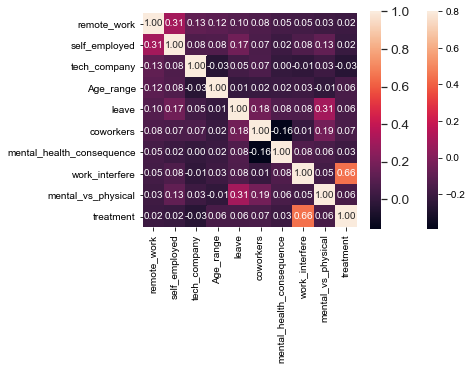

In [34]:
# covariance
mat = data.corr()
sns.heatmap(mat, vmax=0.8, square=True)
# f, ax= plt.subplots(12,9)
v = 10
cols = mat.nlargest(v, "remote_work")["remote_work"].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)
plt.show()

Text(0.5, 0, 'Work Interference')

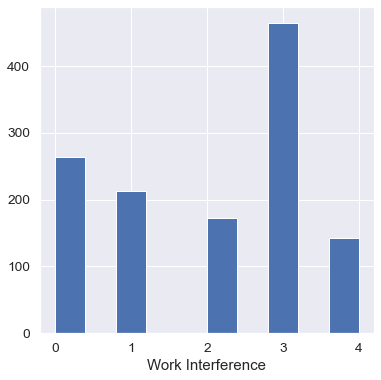

In [35]:
plt.figure(figsize=(6, 6))
plt.hist(data["work_interfere"])
plt.xlabel("Work Interference")

Text(0.5, 0, 'state')

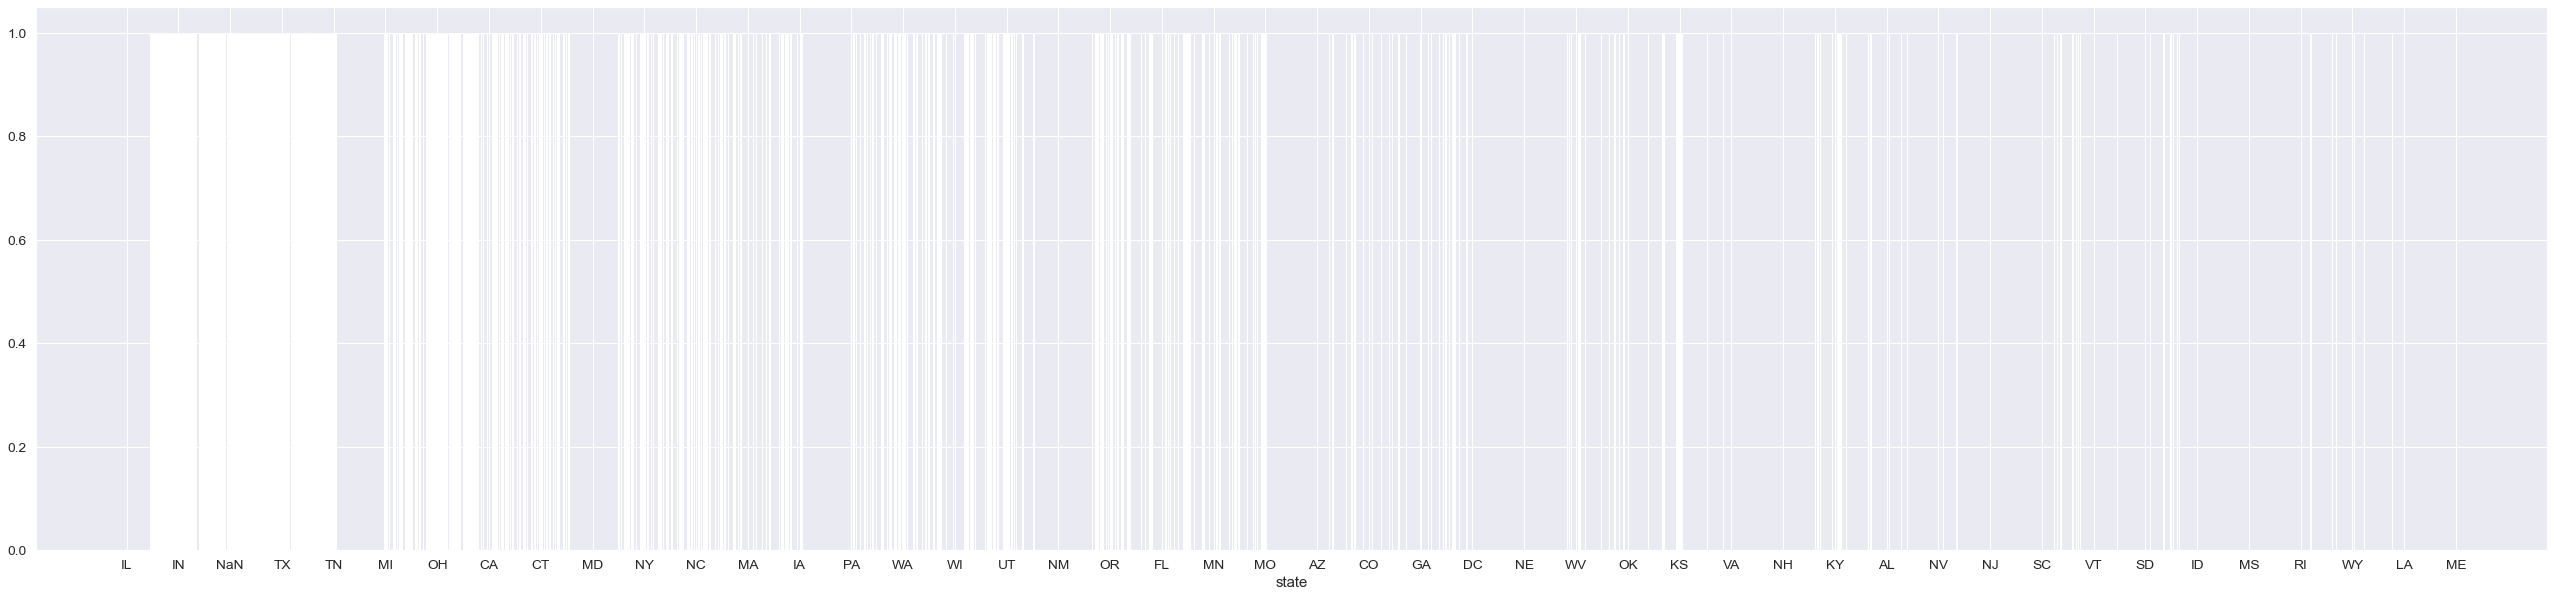

In [36]:
plt.figure(figsize=(45, 10))
plt.hist(data["state"])
plt.xlabel("state")

/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Gender')

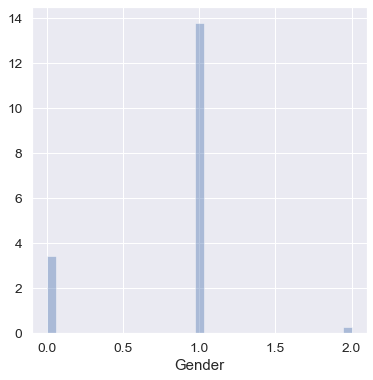

In [37]:
plt.figure(figsize=(6, 6))
sns.distplot(data["Gender"])
plt.xlabel("Gender")

Text(0.5, 0, 'no_employees')

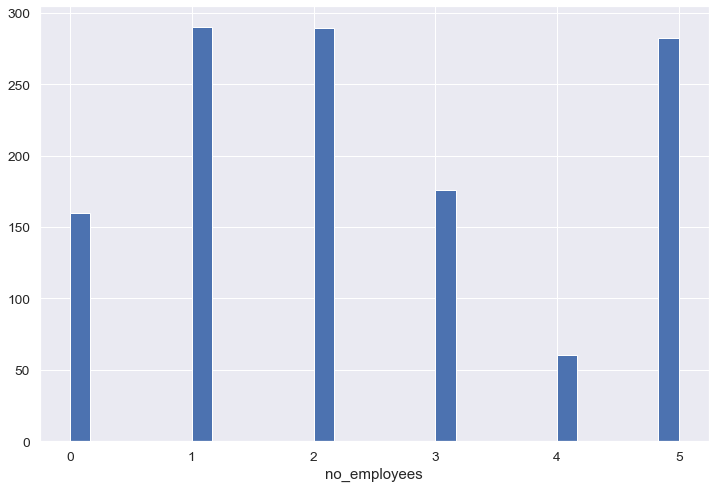

In [38]:
plt.figure(figsize=(12, 8))
plt.hist(data["no_employees"], bins=30)
plt.xlabel("no_employees")

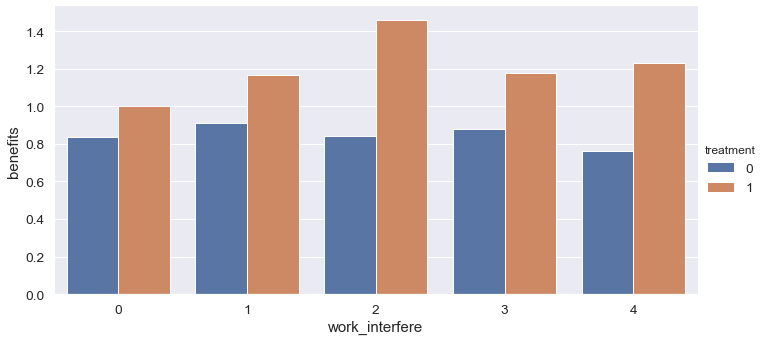

In [41]:
g = sns.catplot(
    x="work_interfere",
    y="benefits",
    hue="treatment",
    data=data,
    kind="bar",
    ci=None,
    height=5,
    aspect=2,
    legend_out=True,
)

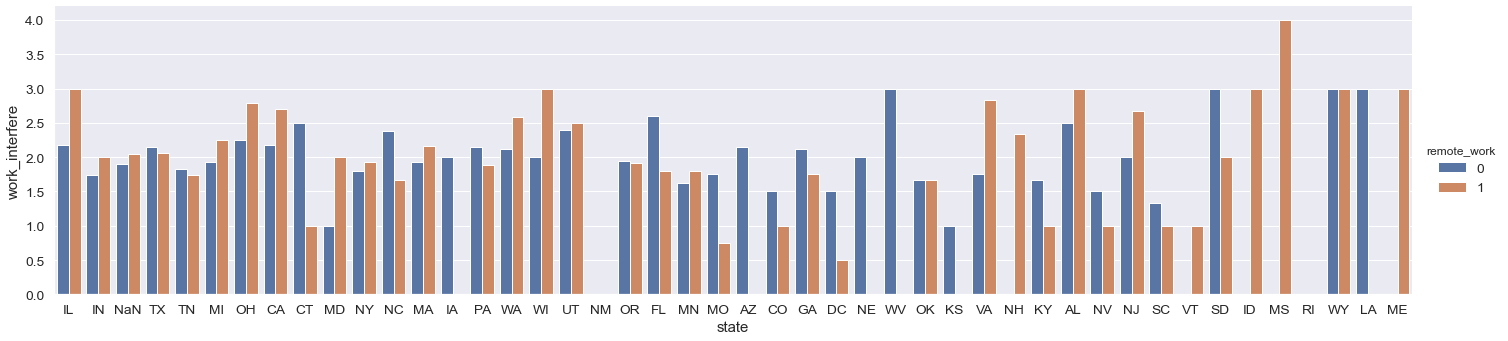

In [42]:
g = sns.catplot(
    x="state",
    y="work_interfere",
    hue="remote_work",
    data=data,
    kind="bar",
    ci=None,
    height=5,
    aspect=4,
    legend_out=True,
)

In [43]:
data.head(5)

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_range
0,0,44,IL,0,0,1,4,1,0,1,...,2,1,1,1,2,1,0,2,0,2
1,1,44,IN,0,0,0,2,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,1,6,NaN,0,0,0,2,1,0,1,...,1,1,1,2,2,2,2,1,0,2
3,1,43,NaN,0,1,1,4,2,0,1,...,1,2,2,1,0,0,0,1,1,2
4,1,44,TX,0,0,0,1,3,1,1,...,0,1,1,1,2,2,2,0,0,2


/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/julietelisagiraso/miniconda3/envs/ml-en-action/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

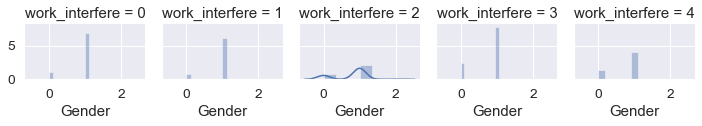

In [44]:
plt.figure(figsize=(12, 12))
g = sns.FacetGrid(data, col="work_interfere", height=2)
g = g.map(sns.distplot, "Gender")

<Figure size 864x864 with 0 Axes>

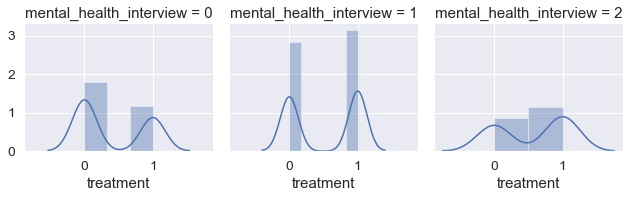

In [45]:
plt.figure(figsize=(12, 12))
g = sns.FacetGrid(data, col="mental_health_interview", height=3)
g = g.map(sns.distplot, "treatment")

Text(0.5, 0, 'no_employees')

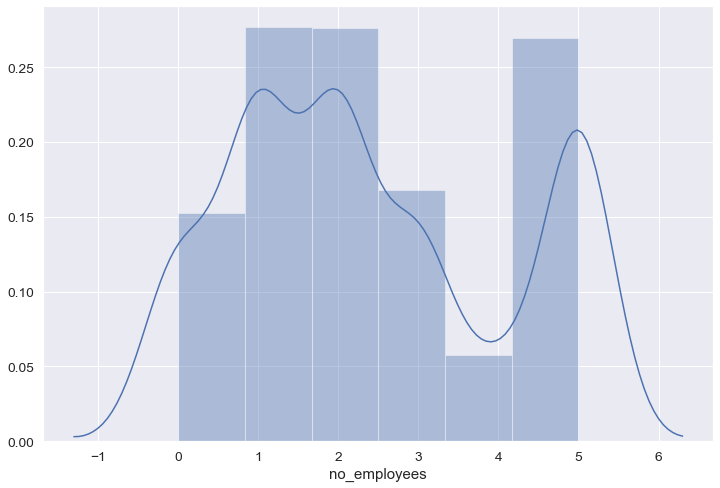

In [46]:
plt.figure(figsize=(12, 8))
sns.distplot(data["no_employees"], bins=6)
plt.xlabel("no_employees")

In [47]:
feature_cols = [
    "Age_range",
    "Gender",
    "mentalhealthinterview",
    "benefits",
    "care_options",
    "anonymity",
    "leave",
    "work_interfere",
]
X = data[feature_cols]
y = data.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0
)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

KeyError: "['mentalhealthinterview'] not in index"

In [48]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(
    range(X.shape[1]),
    importances[indices],
    color="r",
    yerr=std[indices],
    align="center",
)
plt.xticks(range(X.shape[1]), labels, rotation="vertical")
plt.xlim([-1, X.shape[1]])
plt.show()

NameError: name 'X' is not defined

IndentationError: unexpected indent (<ipython-input-49-9005f4054eca>, line 2)